In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ncx2
from scipy.special import iv

## Task 1

### a)

In [2]:
def noncentral_chi_squarred_pdf(x, df=5, nc=5):
    '''
    Parameters for the noncentral chi-squared distribution
    df = degrees of freedom
    nc = noncentrality parameter
    x need to have positive values
    
    '''
    
    return ncx2.pdf(x, df, nc)

In [32]:
# Parameters
k = 5.0  # degrees of freedom
lambda_ = 5.0  # noncentrality parameter
n = 100000  # number of samples

# Generate samples from the noncentral chi-squared distribution
samples = np.random.noncentral_chisquare(k, lambda_, n)

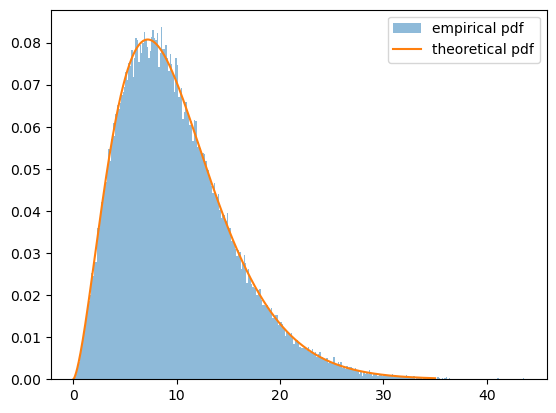

In [33]:
x = np.linspace(0, 35, 1000)
y_a = noncentral_chi_squarred_pdf(xx)
plt.figure(1)
plt.hist(samples, bins=int(np.sqrt(n)), density=True, label='empirical pdf', alpha=0.5)
plt.plot(x, y_a, label='theoretical pdf')


plt.legend()
plt.show()

### b)

In [37]:
f_b = 0.5 * np.exp(-(x+lambda_)/2) * iv(-1+(k/2), np.sqrt(x*lambda_)) * ((x / lambda_)**((k/4)-0.5))

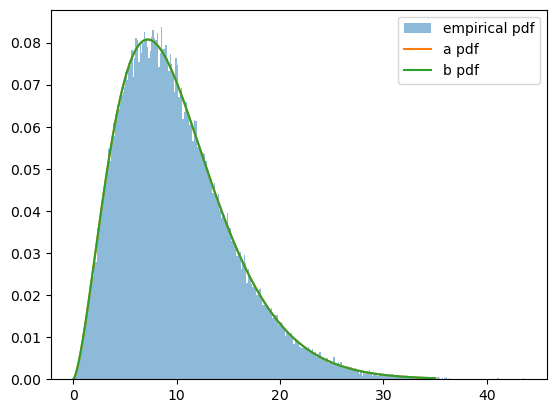

In [115]:
plt.figure(1)
plt.hist(samples, bins=int(np.sqrt(n)), density=True, label='empirical pdf', alpha=0.5)
plt.plot(x, y_a, label='a pdf')
plt.plot(x, f_b, label='b pdf')

plt.legend()
plt.show()

### c)

In [109]:
def inverse_ft(x):
    s = np.linspace(-5, 5, 1000)
    ds = s[1] - s[0]
    if_c = np.exp((1j*lambda_*s)/(1-2*1j*s)) / ((1-2*1j*s)**(k/2))
    f = (1 / (2 * np.pi)) * if_c * np.exp(-1j * s * x) * ds
    return np.sum(f)

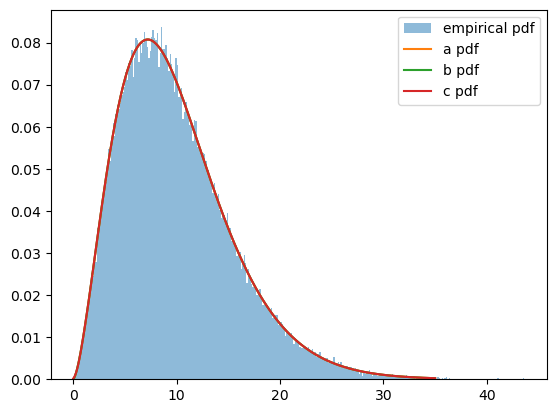

In [116]:
plt.figure(1)
plt.hist(samples, bins=int(np.sqrt(n)), density=True, label='empirical pdf', alpha=0.5)
plt.plot(x, y_a, label='a pdf')
plt.plot(x, f_b, label='b pdf')
plt.plot(x, np.real(f_c), label='c pdf')

plt.legend()
plt.show()

## Task 2

In [140]:
#
r = 0.05
T = 1
S_0 = 1
K = 1.1
sigma = 0.4

# mean and std for the log return
mu_bar = (r - 0.5*sigma**2) * T
sigma_bar = sigma * np.sqrt(T)

In [141]:
def normal_pdf(mu, sigma, x):
    v = sigma**2
    return (1/np.sqrt(2 * np.pi * v)) * np.exp(-0.5 * ((x-mu)**2) / v)

In [142]:
M = 100000
x = np.linspace(np.log(K / S_0), 10, M)
dx = x[1] - x[0]
f = dx * np.exp(-r*T) * (S_0 * np.exp(x) - K) * normal_pdf(mu_bar, sigma_bar, x)
c = np.sum(f)
c

0.1400425710716915